In [1]:
import warnings

warnings.filterwarnings('ignore')

# 2 模仿过程

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 设置默认字体
plt.rcParams['font.sans-serif'] = ['Times New Roman']

raw = pd.read_excel('data.xlsx')
raw.head()

,Company,Grown,Type,Country
0,Amazon,401.1,E-Commerce,USA
1,Microsoft,269.9,Technology,USA
2,Apple,219.1,Technology,USA
3,Tesla,108.4,Automotive,USA
4,Tencent,93.0,Technology,China


In [3]:
type2color = {
    'Technology': '#e2a080',
    'E-Commerce': '#ebb66a',
    'Automotive': '#c198ba',
    'Finance': '#aab5d8',
    'Tele-communications': '#bdd7e4',
    'Media': '#efcfde',
    'Software': '#d5c1c4',
    'Pharmaceutical': '#f9e4ad',
    'Alcohol': '#c3d3ac',
    'Retail': '#88bb70'
}

In [4]:
def create_fill_area(row, top_y=0.8, bottom_y=0.01):
    
    # 初始化包围填充区域的上下线条y坐标
    line1, line2 = [1 - 0.04*row, 1 - 0.04*row], [1- 0.04*(row+1), 1- 0.04*(row+1)]
    
    # 追加阴影段y坐标
    line1.append(0.01 + (25 - row) * (0.8 - 0.01) / 25)
    line2.append(0.01 + (25 - row - 1) * (0.8 - 0.01) / 25)
    
    # 追加最后一段平行段y坐标
    line1.append(0.01 + (25 - row) * (0.8 - 0.01) / 25)
    line2.append(0.01 + (25 - row - 1) * (0.8 - 0.01) / 25)
    
    return line1, line2

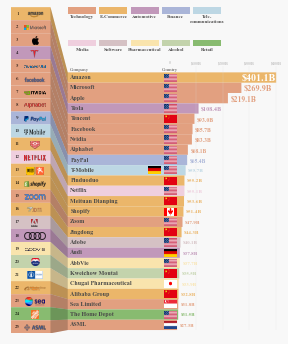

In [5]:
fig, ax = plt.subplots(figsize=(4.8, 6))

ax.set_xlim(0, 1.01)
ax.set_ylim(0, 1)
for row in range(raw.shape[0]):
    
    # 定义区域填充对应的x坐标
    x = [0, 0.15, 0.215, 0.6+raw.at[row, 'Grown'] / 1000]
    
    # 生成区域填充对应的y坐标
    line1, line2 = create_fill_area(row)
    
    # 对指定区域进行填充
    ax.fill_between(x,
                    line1,
                    line2,
                    color=type2color[raw.at[row, 'Type']],
                    edgecolor='none')
    
    # 从logo文件夹下读取对应logo图片
    try:
        logo = plt.imread(f'logo/{raw.at[row, "Company"]}.png')
    except FileNotFoundError:
        logo = plt.imread(f'logo/{raw.at[row, "Company"]}.jpg')
    
    # 插入公司logo
    ax_logo = ax.inset_axes((0.05, 1 - 0.04*(row+1)+0.005, 0.08, 0.025))
    ax_logo.imshow(logo)
    
    ax_logo.axis('off')
    ax_logo.set_facecolor(type2color[raw.at[row, 'Type']])
    
    # 处理单个及多个国家情况下的国旗绘制
    for idx, country in enumerate(raw.at[row, 'Country'].split('&')[::-1]):
        
        # 读取对应国旗图片
        flag = plt.imread(f'flag/{country}.png')
        
        # 插入国旗子图
        ax_flag = ax.inset_axes((0.545-idx*0.06, 0.013+(25 - row - 1)*((0.8 - 0.01) / 25), 0.1, 0.025))
        ax_flag.imshow(flag)

        ax_flag.axis('off')
        ax_flag.set_facecolor(type2color[raw.at[row, 'Type']])
    
    # 绘制排名
    ax.text(0.025, (1 - 0.04*row + 1 - 0.04*(row+1)) / 2, str(row+1), 
            ha='center', va='center',
            fontsize=5, color='black')
    
    # 绘制公司名称
    ax.text(0.215+0.01, 0.5 * (0.01 + (25 - row - 1) * (0.8 - 0.01) / 25 + 0.01 + (25 - row) * (0.8 - 0.01) / 25), 
            raw.at[row, 'Company'], 
            ha='left', va='center',
            fontsize=6, color='#494948', 
            weight='bold')
    
    # 处理第一名文字在填充区域内部，其余文字在填充区域外的情况
    if raw.at[row, 'Company'] == 'Amazon':
        ax.text(1, 0.5 * (0.01 + (25 - row) * (0.8 - 0.01) / 25 
                          + 0.01 + (25 - row - 1) * (0.8 - 0.01) / 25)-0.0025,
                '$'+str(raw.at[row, 'Grown'])+'B',
                color='white',
                fontsize=10,
                ha='right',
                va='center',
                weight='bold')
    
    else:
        # 配合归一化对字体进行大小映射
        ax.text(0.6+raw.at[row, 'Grown'] / 1000 + 0.01, 
                0.5 * (0.01 + (25 - row) * (0.8 - 0.01) / 25 + 0.01 + (25 - row - 1) * (0.8 - 0.01) / 25)-0.0025,
                '$'+str(raw.at[row, 'Grown'])+'B',
                color=type2color[raw.at[row, 'Type']],
                fontsize=5+((raw.at[row, 'Grown'] - raw['Grown'].min()) 
                            / (raw['Grown'].max() - raw['Grown'].min())) * 5,
                ha='left',
                va='center',
                weight='bold')
    
# 对指定区域进行带透明度的黑色蒙版，以达到阴影效果
ax.fill_between([0.15, 0.215],
                [0, 0.01],
                [1, 0.8],
                color='black',
                alpha=0.2, # 设置透明度
                edgecolor='none')

# 补充其余文字标注
ax.text(0.215+0.01, 0.805, 'Company', 
        color='#565555', fontsize=5,
        ha='left')

ax.text(0.6, 0.805, 'Country', 
        color='#565555', fontsize=5,
        ha='center')

# 补充上方数值刻度
ax.text(0.6, 0.825, '0', 
        color='#a9a8a8', fontsize=4,
        ha='center')
    
for i in range(1, 5):
    ax.text(0.6+0.1*i, 0.825, f'${i}00B', 
            color='#a9a8a8', fontsize=4,
            ha='center')
    
    ax.vlines(0.6+0.1*i, 0.01, 0.82, 
              color='#dcdcdb', linewidth=0.2)


ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')

# 补充下排图例
ax_bar1 = ax.inset_axes((0.215, 0.88, 0.57, 0.02), transform=ax.transAxes)
ax_bar1.set_xlim(-0.45, 4.45)
ax_bar1.bar(range(5), height=1, width=0.9, 
            color=['#efcfde', '#d5c1c4', '#f9e4ad', '#c3d3ac', '#88bb70'])

ax_bar1.set_xticks(range(5))
ax_bar1.set_xticklabels(['Media', 'Software', 'Pharmaceutical', 'Alcohol', 'Retail'],
                        fontsize=5, color='#4f4e4e', weight='bold')

ax_bar1.set_yticks([])

ax_bar1.spines['left'].set_color('none')
ax_bar1.spines['right'].set_color('none')
ax_bar1.spines['top'].set_color('none')
ax_bar1.spines['bottom'].set_color('none')
ax_bar1.tick_params(color='none', pad=-2)

ax_bar1.set_facecolor('#f8f8f8')

# 补充上排图例
ax_bar2 = ax.inset_axes((0.215, 0.98, 0.57, 0.02), transform=ax.transAxes)
ax_bar2.set_xlim(-0.45, 4.45)
ax_bar2.bar(range(5), height=1, width=0.9, 
            color=['#e2a080', '#ebb66a', '#c198ba', '#aab5d8', '#bdd7e4'])

ax_bar2.set_xticks(range(5))
ax_bar2.set_xticklabels(['Technology', 'E-Commerce', 'Automotive', 'Finance', 'Tele-\ncommunications'],
                        fontsize=5, color='#4f4e4e', weight='bold')

ax_bar2.set_yticks([])

ax_bar2.spines['left'].set_color('none')
ax_bar2.spines['right'].set_color('none')
ax_bar2.spines['top'].set_color('none')
ax_bar2.spines['bottom'].set_color('none')
ax_bar2.tick_params(color='none', pad=-2)

ax_bar2.set_facecolor('#f8f8f8')


ax.set_facecolor('#f8f8f8')
fig.set_facecolor('#f8f8f8')

fig.savefig('图3.png', dpi=800, bbox_inches='tight')